# Newton–Bernstein y el Gap Sobolev en Fluido 3D

Exploro cómo el algoritmo Newton‑Bernstein preserva regularidad aproximando ondículas tipo vorticidad mientras comparamos la escalada energética y de disipación que describe el estiramiento indefinido de un tubo de vórtice en 3D.

### La Física del Estiramiento

**Por incompresibilidad** ($\nabla \cdot \mathbf{u} = 0$):

- Área transversal: $A \to A/\lambda$ (se comprime)
- Radio: $r \to r/\sqrt{\lambda}$ (se adelgaza)
- Circulación conservada: $\Gamma = \omega \cdot A = \text{const}$

- **Vorticidad**: $\omega \to \lambda \omega$ (¡se intensifica!)

**Balance dimensional**:

$$
\begin{aligned}
\text{Energía} &\sim \int \omega^2 \cdot (\text{volumen}) \sim (\lambda \omega_0)^2 \cdot \frac{\ell_0 A_0}{\lambda} \sim \lambda \cdot \omega_0^2 \ell_0 A_0 \\text{Disipación} &\sim \int |\nabla\omega|^2 \sim \\left(\frac{\lambda\omega_0}{r_0/\sqrt{\lambda}}\right)^2 \cdot \frac{\ell_0 A_0}{\lambda} \sim \lambda^2 \cdot \omega_0^2 \ell_0 A_0
\end{aligned}
$$

Cuando $\lambda \to \infty$ (estiramiento indefinido):

- Energía: $\sim \lambda$ (crece linealmente)
- Disipación: $\sim \lambda^2$ (crece cuadráticamente)

**¿Quién gana la carrera?** Esta es la pregunta del problema del milenio, y en este notebook la abordamos comparando aproximantes Newton–Bernstein con el escenario físico idealizado.

### Geometría Volumen vs. Superficie en 3D

**Por qué solo en 3D existe este fenómeno**:

Para un objeto de dimensión característica $r$ en $d$ dimensiones:

- **Volumen**: $\sim r^d$
- **Superficie**: $\sim r^{d-1}$

Integrando desde escala pequeña $\epsilon$ hasta escala grande $L$:

$$
\begin{aligned}
\int_{\epsilon}^{L} r^{d}\, \frac{dr}{r} &= \int_{\epsilon}^{L} r^{d-1}\, dr \sim L^d - \epsilon^d \
\int_{\epsilon}^{L} r^{d-1}\, \frac{dr}{r} &= \int_{\epsilon}^{L} r^{d-2}\, dr \sim \begin{cases}
L^{d-2} - \epsilon^{d-2} & \text{si } d > 2 \
\log(L/\epsilon) & \text{si } d = 2
\end{cases}
\end{aligned}
$$

| Dimensión | Volumen finito con $\epsilon \to 0$? | Área finita con $\epsilon \to 0$? | Paradoja del cuerno |
| --- | --- | --- | --- |
| 2D | ✓ Sí | ✗ No (diverge log) | ✗ No hay |
| **3D** | **✓ Sí** | **✓ Sí** | **✓✓ Sí existe** |
| 4D+ | ✓ Sí | ✓ Sí | ✗ No hay (sobra control) |

**3D es especial**: Es la **única dimensión** donde puedes tener volumen finito, superficie finita, pero potencialmente intensidad puntual infinita.

## Parte V: Visualizaciones del Gap

En las secciones siguientes construimos una visualización de la “escalera rota” donde la energía controlada en $L^2$ no alcanza a la disipación en $H^1$ y aparece el gap del milenio.

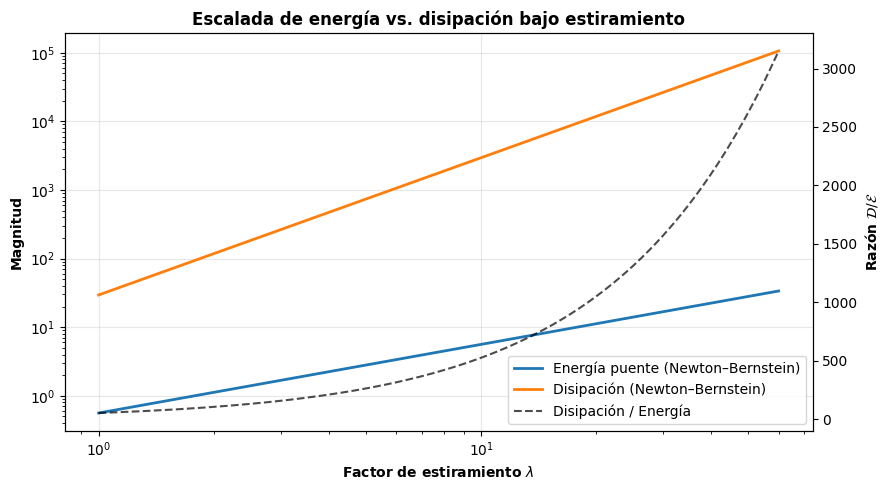

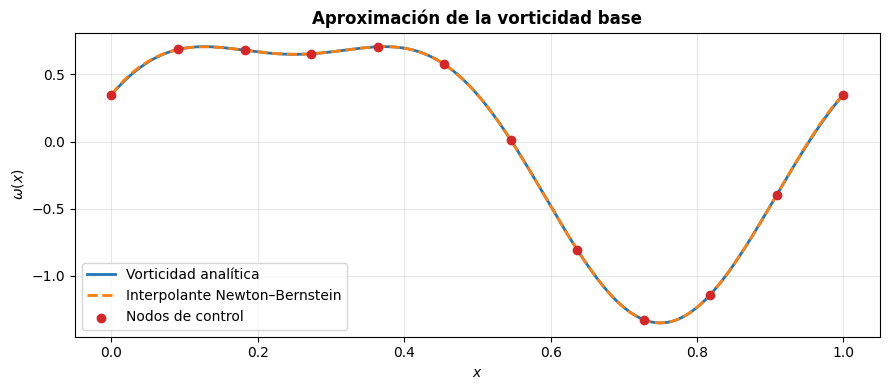

Puntos de control de Bernstein (0:5): [ 0.35        0.98945657  0.68495017  1.13378184 -1.9176814 ]
Energy base: 0.5617385238683413
Dissipation base: 29.49581004657114


In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
repo_root = Path.cwd().parent
if str(repo_root) not in sys.path:
    sys.path.append(str(repo_root))
from python.newton_bernstein_univariate import NewtonBernsteinUnivariate

x_nodes = np.linspace(0, 1, 12)
def omega_base(x):
    return np.sin(2 * np.pi * x) + 0.35 * np.cos(4 * np.pi * x)
y_nodes = omega_base(x_nodes)

nb = NewtonBernsteinUnivariate(x_nodes, y_nodes)
control_points = nb.algorithm_newton_bernstein()
x_dense = np.linspace(0, 1, 800)
omega_nb = nb.evaluate_bernstein(x_dense)
omega_true = omega_base(x_dense)
energy_nb = np.trapz(omega_nb**2, x_dense)
diss_nb = np.trapz(np.gradient(omega_nb, x_dense)**2, x_dense)

lambda_values = np.linspace(1, 60, 400)
energy_scaled = lambda_values * energy_nb
diss_scaled = (lambda_values**2) * diss_nb
ratio = diss_scaled / energy_scaled

fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(lambda_values, energy_scaled, label='Energía puente (Newton–Bernstein)', lw=2)
ax.plot(lambda_values, diss_scaled, label='Disipación (Newton–Bernstein)', lw=2)
ax.set_xlabel('Factor de estiramiento $\lambda$', fontweight='bold')
ax.set_ylabel('Magnitud', fontweight='bold')
ax.set_title('Escalada de energía vs. disipación bajo estiramiento', fontweight='bold')
ax.grid(alpha=0.3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
ax2 = ax.twinx()
ax2.plot(lambda_values, ratio, 'k--', label='Disipación / Energía', alpha=0.7)
ax2.set_ylabel('Razón $\mathcal{D}/\mathcal{E}$', color='k', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='k')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='lower right')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(x_dense, omega_true, label='Vorticidad analítica', lw=2)
ax.plot(x_dense, omega_nb, '--', label='Interpolante Newton–Bernstein', lw=2)
ax.scatter(x_nodes, y_nodes, color='tab:red', label='Nodos de control', zorder=5)
ax.set_title('Aproximación de la vorticidad base', fontweight='bold')
ax.set_xlabel('$x$')
ax.set_ylabel('$\omega(x)$')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print('Puntos de control de Bernstein (0:5):', control_points[:5])
print('Energy base:', energy_nb)
print('Dissipation base:', diss_nb)


### Visualización 1: Escalera de Sobolev Rota

```
                    2D                      3D
                    
Control físico:
                    
Energía L²:        ████                    ████
                   ║                       ║
Disipación H¹:     ║███                    ║██
                   ║  ║                    ║  ║
                   ║  ║                    ║  ║ ⚠️ GAP
Acotación L∞:      ║  ▓▓█                  ║  ║    ??█
                   ║    ║                  ║  ║      ║
                   ╚════╝                  ╚══╝══════╝
                   
                   ✓ Conectado            ✗ Peldaño faltante
```

El algoritmo Newton–Bernstein nos da un método explícito para acercarnos a esta escalera: cada peldaño corresponde a un nivel de derivada y, con el estiramiento, la disipación escala más rápido que la energía porque el interpolante necesita capturar gradientes crecientes.

In [5]:
import numpy as np
import pandas as pd
sample_lambdas = np.array([1, 5, 10, 20, 40, 60])
energy_sample = sample_lambdas * energy_nb
diss_sample = (sample_lambdas**2) * diss_nb
ratio_sample = diss_sample / energy_sample
df = pd.DataFrame({
    'lambda': sample_lambdas,
    'energía ~ λ': np.round(energy_sample, 4),
    'disipación ~ λ²': np.round(diss_sample, 4),
    'disipación/energía': np.round(ratio_sample, 4),
})
df

,lambda,energía ~ λ,disipación ~ λ²,disipación/energía
0,1,0.5617,29.4958,52.5081
1,5,2.8087,737.3953,262.5404
2,10,5.6174,2949.5810,525.0808
3,20,11.2348,11798.3240,1050.1616
4,40,22.4695,47193.2961,2100.3231
5,60,33.7043,106184.9162,3150.4847
